In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format="retina"

In [2]:
train_data = pd.read_csv("interactions_train.csv")
train_data.head(5)

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


## EDA

### Count Users -> How many times did each user contribute?

In [3]:
user_counts = pd.DataFrame(train_data["user_id"].value_counts()[:20])
user_counts = user_counts.rename(columns={"user_id": "user_counts"})

<AxesSubplot:xlabel='user_counts'>

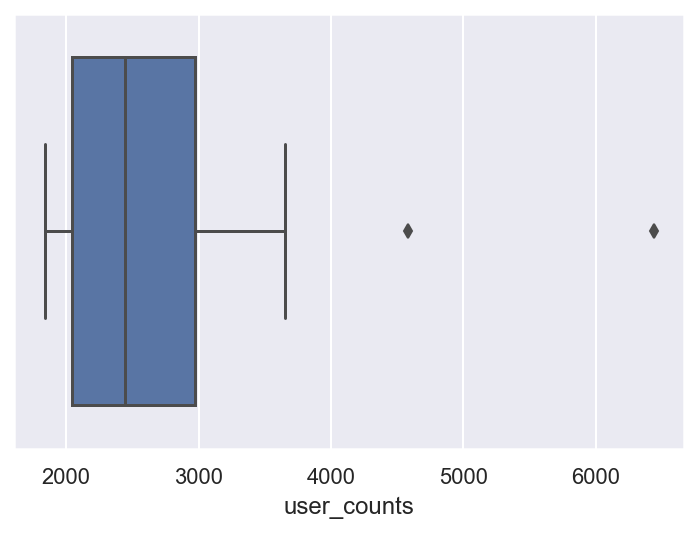

In [4]:
sns.boxplot(data=user_counts, x="user_counts")

### Count Recipes -> How many times did each recipe be applied?

In [5]:
recipe_counts = pd.DataFrame(train_data["recipe_id"].value_counts()[:20])
recipe_counts = recipe_counts.rename(columns={"recipe_id": "recipe_counts"})

<AxesSubplot:xlabel='recipe_counts'>

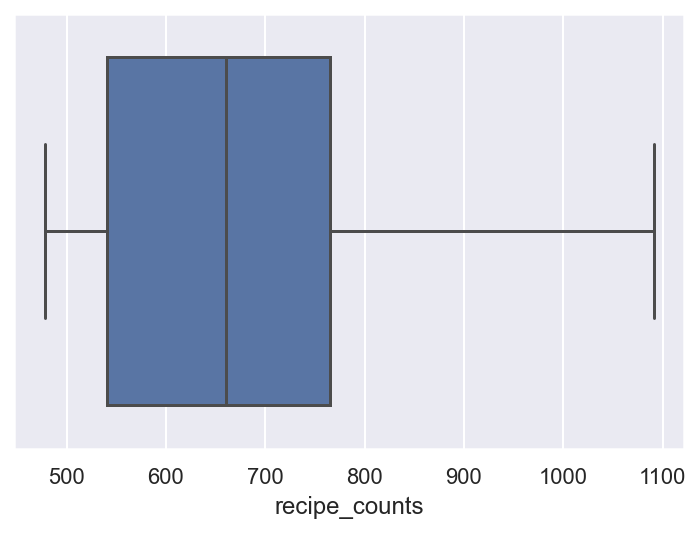

In [6]:
sns.boxplot(data=recipe_counts, x="recipe_counts")

### Count Ratings -> How many times did each rating be assigned?

In [7]:
rating_counts = pd.DataFrame(train_data.groupby("rating").count()["user_id"])
rating_counts = rating_counts.rename(columns={"user_id": "rating_counts"})

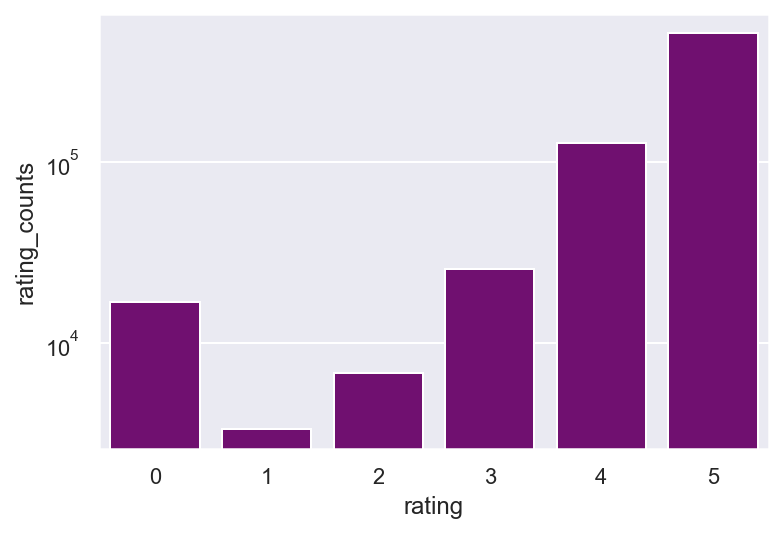

In [8]:
bar = sns.barplot(data=rating_counts, x=rating_counts.index.astype(int), y="rating_counts", color="purple")
bar.set_yscale("log")